In [20]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Check the list of datasets
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'ai2dcaption',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asimov_dilemmas_auto_val',
 'asimov_dilemmas_scifi_train',
 'asimov_dilemmas_scifi_val',
 'asimov_injury_val',
 'asimov_multimodal_auto_val',
 'asimov_multimodal_manual_val',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 '

In [3]:
# Load th dataset
ds = tfds.load('mnist', split='train', shuffle_files=True)
assert isinstance(ds, tf.data.Dataset)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.9T4UPO_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.9T4UPO_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
# Split train set and test set
(train_images, train_labels), (test_image, test_labels) = tfds.as_numpy(
    tfds.load(
        'mnist',
        split=['train', 'test'],
        batch_size=-1,
        as_supervised=True
    )
)

Label latih :  4


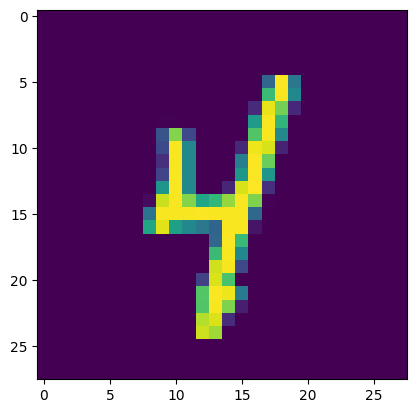

In [7]:
# Show one of the image in dataset
np.set_printoptions(linewidth=200)
plt.imshow(train_images[0])
print('Label latih : ',train_labels[0])

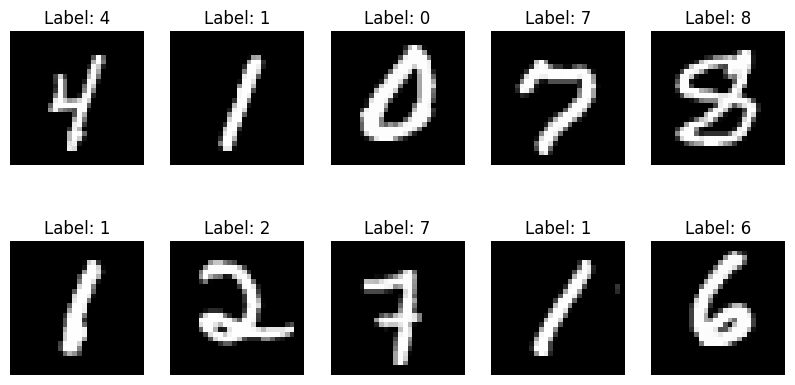

In [16]:
# Visualize some samples
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Label: {train_labels[i]}')
    plt.axis('off')
plt.show()

In [18]:
# Count the number of each label in the training dataset
label_counts_train = np.bincount(train_labels)
label_counts_test = np.bincount(test_labels)
label_counts = label_counts_train + label_counts_test

print("Jumlah masing-masing label (0-9) dalam dataset MNIST:")
for i in range(10):
    print(f"Label {i}: {label_counts[i]}")

Jumlah masing-masing label (0-9) dalam dataset MNIST:
Label 0: 6903
Label 1: 7877
Label 2: 6990
Label 3: 7141
Label 4: 6824
Label 5: 6313
Label 6: 6876
Label 7: 7293
Label 8: 6825
Label 9: 6958


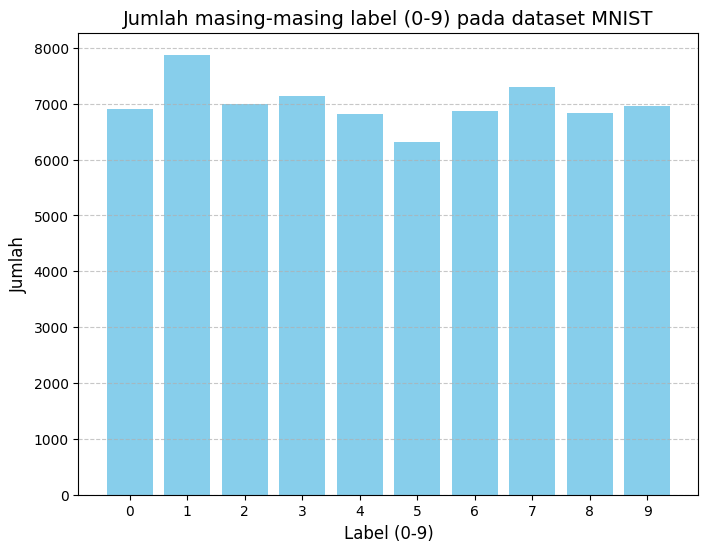

In [19]:
plt.figure(figsize=(8, 6))
plt.bar(range(10), label_counts, color='skyblue')
plt.xlabel('Label (0-9)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.title('Jumlah masing-masing label (0-9) pada dataset MNIST', fontsize=14)
plt.xticks(range(10))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [8]:
# Modelling
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu' ,input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(
    optimizer= tf.keras.optimizers.RMSprop(),
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics= ['accuracy']
)

In [10]:
# Initialize the Callbacks
class MyCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.96):
      print('\nAkurasi telah mencapai 96%!')
      self.model.stop_training = True

callbacks = MyCallbacks()

In [11]:
hist = model.fit(train_images, train_labels, batch_size=50, callbacks=[callbacks] ,epochs=5)

Epoch 1/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 52s 43ms/step - accuracy: 0.8333 - loss: 0.9024
Epoch 2/5
1199/1200 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9744 - loss: 0.0876
Akurasi telah mencapai 96%!
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.9744 - loss: 0.0876


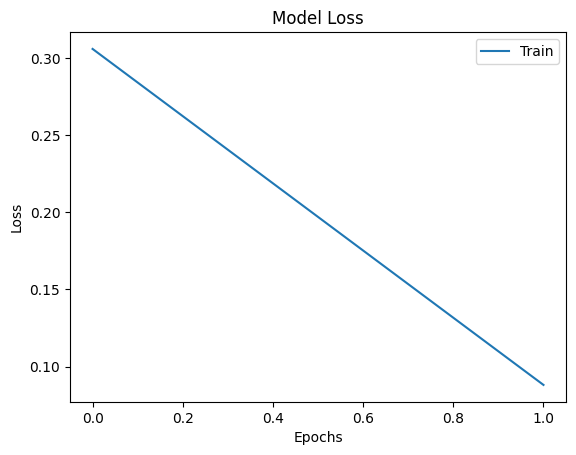

In [12]:
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train'], loc='best')

Text(0, 0.5, 'Accuracy')

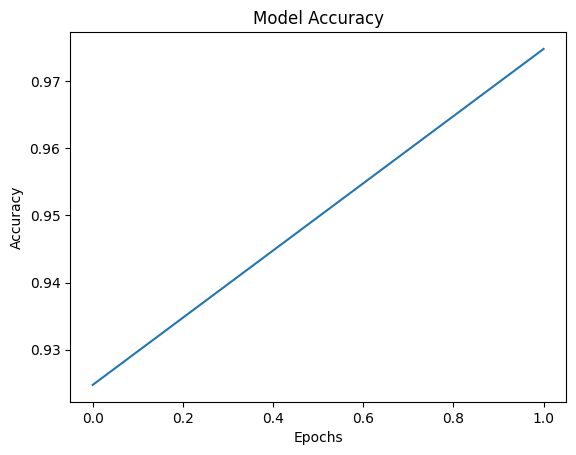

In [13]:
plt.plot(hist.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [14]:
model.evaluate(test_image, test_labels, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9807 - loss: 0.0686


[0.0747138187289238, 0.979200005531311]

In [21]:
# Confusion Matrix and Classification Report
y_pred = model.predict(test_image)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(test_labels, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.95      0.99      0.97      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.96      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.96      0.97      1028
           8       0.95      0.99      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



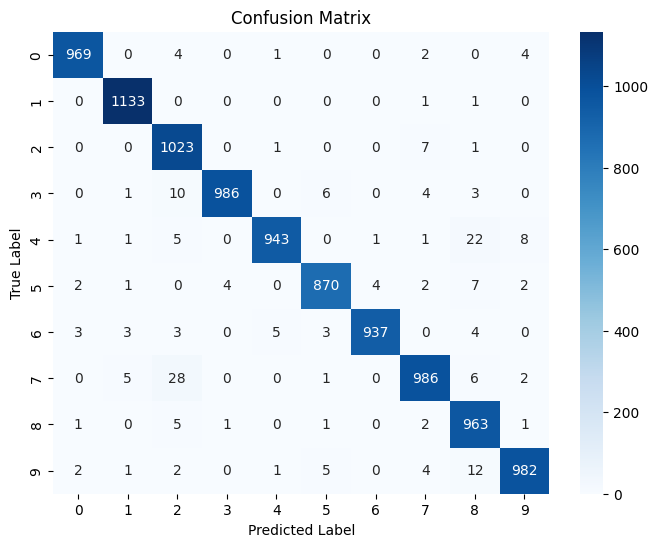

In [22]:
cm = confusion_matrix(test_labels, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [15]:
# Save model
model.save('Mnist_TFDSClassification_Model.h5')

**Hasil Training**

* Pemberhentian dengan Callback Pada epoch kedua, model mencapai akurasi 97.44% dan callback menghentikan pelatihan karena mencapai akurasi > 96%, yang mengindikasikan bahwa model sudah cukup baik untuk menghentikan pelatihan lebih awal.

**Hasil Testing**
* Model mencapai akurasi 98.07% pada data uji, menunjukkan bahwa model dapat menggeneralisasi dengan baik pada data yang tidak terlihat sebelumnya.

* Nilai loss pada pengujian adalah 0.0686, yang berarti model tidak hanya akurat tetapi juga memiliki prediksi yang sangat konsisten.

**Classification Report**
* Precision, Recall, dan F1-Score untuk setiap label (0-9) menunjukkan kinerja yang sangat baik:

* Label 1 (angka 1) memiliki recall 1.00, artinya model sangat baik dalam mengklasifikasikan angka 1.

* Label 2 dan Label 8 memiliki recall yang tinggi (0.99) dan f1-score yang baik.

* Label 5 dan Label 7 menunjukkan recall sedikit lebih rendah (0.96), namun masih sangat baik.

* Label 0, 3, 6, 9 memiliki precision dan recall mendekati 1.00, menunjukkan bahwa model sangat akurat dalam memprediksi angka-angka tersebut.